In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from astropy.time import Time
import palettable
# added by Arash: These are to compile tick labels and axis labels with Latex
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
import pandas
from astropy.time import Time


In [98]:
df = pandas.read_csv('SaraHive_combined_readings_2020-05-09T140910.959Z.csv')
dfw = pandas.read_csv('SaraHive_weather_2020-05-09T140913.876Z.csv')


In [99]:
len(dfw['Local_TimeStamp'])

44

In [100]:

def switchtimefmt(intimes=dfw['Local_TimeStamp']):
    newtimes=([])
    for j in range(0, len(intimes)):
        if np.shape(newtimes)<1:
            newtimes=pandas.Timestamp(intimes[j])
        else:
            newtimes=np.append(newtimes, pandas.Timestamp(intimes[j]))
    formatted_time = Time((newtimes),format='datetime').isot

    t = Time(formatted_time, format='isot')
    t_mjd= t.mjd
    return t_mjd


In [101]:
newtimes=switchtimefmt()
newtimes_data=switchtimefmt(intimes=df['Local_TimeStamp'])

In [107]:
t_cel=(df['Temperature']-32.0)*(5.0/9.0)
w_cel=(dfw['Temperature']-32.0)*(5.0/9.0)


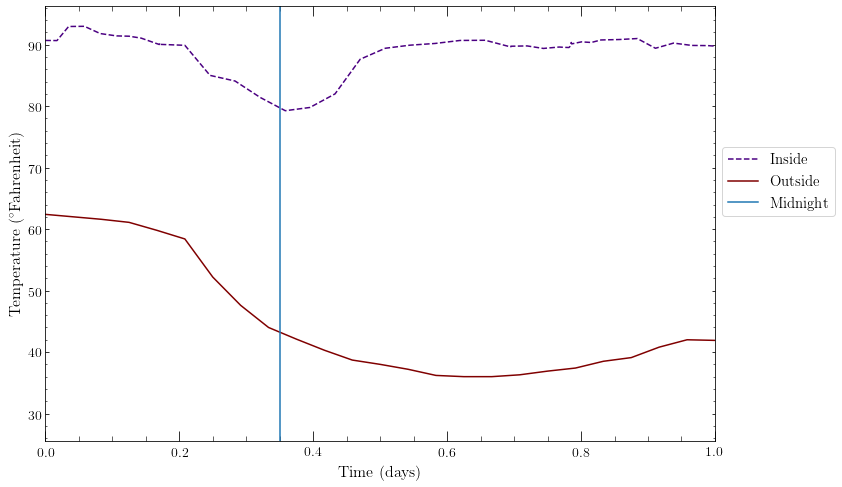

In [102]:

plt.figure(figsize=(12,8))
plt.plot(newtimes_data-newtimes_data[0], df['Temperature'], '--', color='indigo', label='Inside')
plt.plot(newtimes-newtimes[0], dfw['Temperature'], color='maroon', label='Outside')
plt.tick_params(axis='y', which='both',direction='in',right='on', top='on') 
plt.tick_params(axis='x', which='both',direction='in',right='on', top='on') 
plt.minorticks_on()  
plt.tick_params(axis='x', which='major', length=10)        # To set tick size
plt.tick_params(axis='x', which='minor', length=5) 
plt.axvline(x=0.35, label='Midnight')
plt.ylabel('Temperature ($^{\circ}$Fahrenheit)', fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.5),loc=3,numpoints=1,fontsize=15)
plt.xlim(0,1)
plt.xlabel('Time (days)', fontsize=16)
plt.savefig('day1.png', bbox_inches='tight')

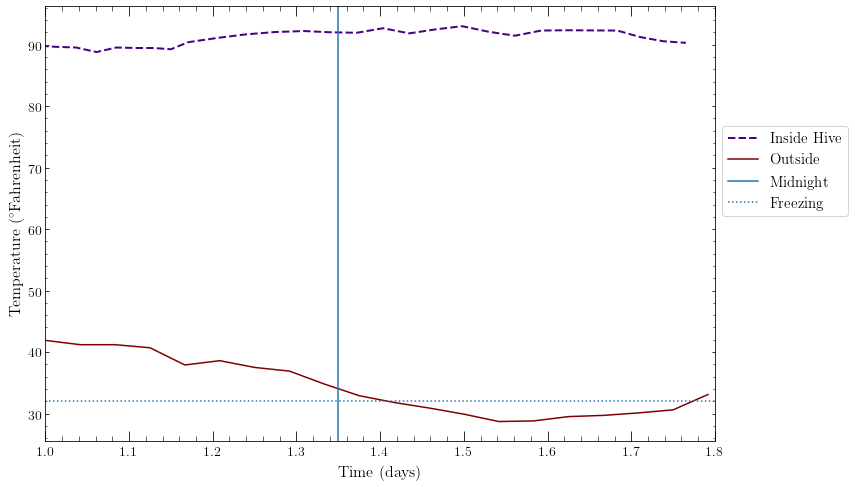

In [127]:

plt.figure(figsize=(12,8))
plt.plot(newtimes_data-newtimes_data[0], df['Temperature'], '--', linewidth=2,color='indigo', label='Inside Hive')
plt.plot(newtimes-newtimes[0], dfw['Temperature'], color='maroon', label='Outside')
plt.tick_params(axis='y', which='both',direction='in',right='on', top='on') 
plt.tick_params(axis='x', which='both',direction='in',right='on', top='on') 
plt.minorticks_on()  
plt.tick_params(axis='x', which='major', length=10)        # To set tick size
plt.tick_params(axis='x', which='minor', length=5) 
plt.axvline(x=1.35, label='Midnight')
plt.axhline(y=32,  ls=':',label='Freezing')
#plt.axhline(y=92, label='Target Temp')

plt.ylabel('Temperature ($^{\circ}$Fahrenheit)', fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.5),loc=3,numpoints=1,fontsize=15)

plt.xlim(1,1.8)
plt.xlabel('Time (days)', fontsize=16)
plt.savefig('day2.png', bbox_inches='tight')

In [129]:
np.correlate(df['Temperature'], df['Humidity'], mode='same')

array([121983.35, 125441.61, 128904.42, 132359.39, 135800.48, 139244.19,
       142644.79, 146050.78, 149443.75, 153108.4 , 156678.6 , 160154.49,
       163591.45, 167088.32, 170482.9 , 174006.09, 177422.34, 181157.4 ,
       186000.12, 190142.21, 194854.84, 199722.25, 204314.11, 208817.82,
       212772.75, 216601.83, 220455.34, 224424.04, 228272.61, 232273.29,
       236321.9 , 240498.87, 244718.6 , 249080.72, 253430.15, 257446.57,
       261532.09, 257916.37, 254615.21, 250787.23, 247228.21, 243596.76,
       239664.12, 236255.72, 233285.86, 230002.22, 226777.39, 223501.78,
       220431.96, 217427.86, 214572.5 , 211683.23, 208877.18, 205930.3 ,
       203071.93, 199491.28, 195833.3 , 192511.82, 189084.78, 185624.13,
       182180.44, 178762.36, 175438.19, 172116.91, 168515.04, 164937.68,
       161714.7 , 158122.76, 154715.02, 150945.59, 147254.51, 143660.65])

In [140]:
signalFFT=np.fft.fft(df['Temperature'])

In [143]:
signalPSD = np.abs(signalFFT) ** 2 
fftFreq = np.fft.fftfreq(len(signalPSD)) 

/home/kcdage/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


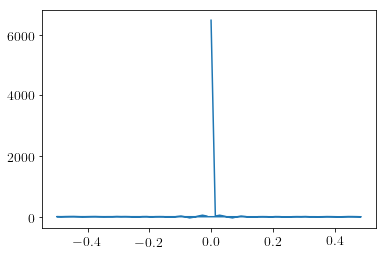